In [2]:
#Importação do pandas
import pandas as pd
#Importação da biblioteca unidecode usada para retirara caracteres especiais e acentos
from unidecode import unidecode

In [3]:
#Importar os dados da base de IPTU, declarando o campo "QDE_LANCAMENTOS" como campo de texto
df_iptu = pd.read_csv('iptu-bairro.csv',delimiter=';',converters={'QDE_LANCAMENTOS':str})

#Renomeando algumas colunas para facilitar a manipulação
df_iptu.rename(columns={'BAIRRO':'neighborhood'},inplace=True)
df_iptu.rename(columns={'QDE_LANCAMENTOS':'qde_lancamentos','VALOR_TOTAL_LANCADO':'vl_lancado'},inplace=True)

#Tratando os campos de texto retirando o separador de milhar e substituindo "," por "." para conversão para float
df_iptu['vl_lancado'] = df_iptu['vl_lancado'].apply(lambda x: float(x.replace(".","").replace(",",".")))
df_iptu['qde_lancamentos'] = df_iptu['qde_lancamentos'].apply(lambda x: float(x.replace(".","")))

#Criação de um campo com o valor médio de IPTU através da divisão do valor lançado e quantidade de lançamentos
df_iptu['vl_medio_iptu'] = df_iptu['vl_lancado'] / df_iptu['qde_lancamentos']

#Alterando todas as letras para minusculas, retirando espaços em branco antes e após o nome
df_iptu['neighborhood'] = df_iptu['neighborhood'].apply(lambda x: x.lower())
df_iptu['neighborhood'] = df_iptu['neighborhood'].apply(lambda x: x.strip())

#Usando a biblioteca Unidecode para retirar caracteres especiais e acentuações
df_iptu['neighborhood'] = df_iptu['neighborhood'].map(lambda x: unidecode(x))

#Segue visualização do DataFrame com 451 registros
df_iptu

neighborhood  qde_lancamentos   vl_lancado  vl_medio_iptu
0               centro          29626.0  75845651.18    2560.104340
1              savassi          22528.0  89081359.94    3954.250708
2              buritis          21550.0  58650996.06    2721.623947
3              lourdes          19450.0  88296159.71    4539.648314
4       santa efigenia          15456.0  45617715.80    2951.456768
..                 ...              ...          ...            ...
446           andiroba              1.0       338.67     338.670000
447         sport club              1.0       209.87     209.870000
448  conego pinheiro a              1.0       677.34     677.340000
449         vila pinho              1.0      1146.55    1146.550000
450            bacurau              1.0      1354.68    1354.680000

[451 rows x 4 columns]

In [4]:
#Importar a base de dados de anuncios de imóveis, declarando o campo "neighborhood" como campo de texto
df_dados = pd.read_csv('data.csv',delimiter=',',converters={'neighborhood':str})

#Alterando todas as letras para minusculas, retirando espaços em branco antes e após o nome
df_dados['neighborhood'] = df_dados['neighborhood'].apply(lambda x: x.lower())
df_dados['neighborhood'] = df_dados['neighborhood'].apply(lambda x: x.strip())

#Usando a biblioteca Unidecode para retirar caracteres especiais e acentuações
df_dados['neighborhood'] = df_dados['neighborhood'].map(lambda x: unidecode(x))

#Renomeando algumas colunas para facilitar a manipulação
df_dados.rename(columns={'garage-places':'garage_places','square-foot':'square_foot'},inplace=True)

#Segue visualização do DataFrame com 5.981 registros
df_dados

address  adm-fees garage_places      price  \
0           Avenida Raja Gabaglia, 1583      470.0             1   330000.0   
1              Rua Espírito Santo, 1171        NaN             1   480000.0   
2         Rua dos Expedicionários, 1082        NaN             5  1190000.0   
3               Rua Marechal Hermes, 81      750.0             4  1590000.0   
4                       Rua Juruna, 110        NaN             6   550000.0   
...                                  ...       ...           ...        ...   
5976                 Rua Gama Cerqueira      340.0             2   560000.0   
5977           Rua Arthur Lourenço, 262      200.0             1   440000.0   
5978  Rua General Ephigênio Ruas Santos       10.0             2   500000.0   
5979  Rua General Ephigênio Ruas Santos       10.0             2   740000.0   
5980                Avenida do Contorno        NaN             3  4990000.0   

     rooms square_foot  neighborhood              city   latitude  longitude  
0        1          40    luxemburgo   Belo Horizonte  -19.936415 -43.953396  
1        2       45-65        centro   Belo Horizonte  -18.864776 -41.121777  
2        4         411  santa amelia   Belo Horizonte  -20.225241 -44.397780  
3        4         158     gutierrez   Belo Horizonte  -19.937155 -43.958694  
4        3         278     pindorama   Belo Horizonte  -19.912982 -44.019944  
...    ...         ...           ...               ...        ...        ...  
5976     3          92   nova suissa   Belo Horizonte  -19.945428 -43.970988  
5977     3          90      barreiro   Belo Horizonte  -19.979915 -44.026007  
5978     3          80        itapoa   Belo Horizonte  -19.840904 -43.956037  
5979     3          80        itapoa   Belo Horizonte  -19.840904 -43.956037  
5980    --         428       savassi   Belo Horizonte  -19.915643 -43.945380  

[5981 rows x 10 columns]

In [5]:
#Realizado a junção dos DataFrames usando inner, sendo assim considerado somente os campos comuns entre as duas bases
df_merge = pd.merge(df_dados, df_iptu, how = 'inner', on = 'neighborhood')

#Segue visualização do DataFrame com 5.846 registros
df_merge

address  adm-fees garage_places      price  \
0            Avenida Raja Gabaglia, 1583      470.0             1   330000.0   
1     Rua Doutor Juvenal dos Santos, 324      900.0             2   850000.0   
2                     Rua Flavita Bretas      620.0             2   610000.0   
3          Rua Doutor Juvenal dos Santos      900.0             2   850000.0   
4             Rua Doutor Pereira de Melo        NaN             3   950000.0   
...                                   ...       ...           ...        ...   
5841                       Rua São Pedro        NaN             8   750000.0   
5842             Rua Gustavo da Silveira        NaN            --  6000000.0   
5843                  Rua Noraldino Lima      200.0             1   300000.0   
5844                       Rua Guanabara      186.0             1   240000.0   
5845  Rua Doutor Francisco Silveira, 190      110.0             1   280000.0   

     rooms square_foot     neighborhood              city   latitude  \
0        1          40       luxemburgo   Belo Horizonte  -19.936415   
1        3         120       luxemburgo   Belo Horizonte  -19.950826   
2        3         120       luxemburgo   Belo Horizonte  -19.946804   
3        3         120       luxemburgo   Belo Horizonte  -19.950826   
4        5         335       luxemburgo   Belo Horizonte  -19.943202   
...    ...         ...              ...               ...        ...   
5841     4         180  horto florestal   Belo Horizonte  -19.845364   
5842    --        1352  horto florestal   Belo Horizonte  -19.886851   
5843     3          60        aeroporto   Belo Horizonte  -19.858387   
5844     2          71             urca   Belo Horizonte  -19.900259   
5845     3          60       petropolis   Belo Horizonte  -20.012007   

      longitude  qde_lancamentos   vl_lancado  vl_medio_iptu  
0    -43.953396           4430.0  19009728.42    4291.135084  
1    -43.958545           4430.0  19009728.42    4291.135084  
2    -43.957575           4430.0  19009728.42    4291.135084  
3    -43.958545           4430.0  19009728.42    4291.135084  
4    -43.955497           4430.0  19009728.42    4291.135084  
...         ...              ...          ...            ...  
5841 -43.955146            857.0   1689058.88    1970.897176  
5842 -43.912828            857.0   1689058.88    1970.897176  
5843 -43.959045           1202.0   2801311.49    2330.542005  
5844 -43.936488            600.0    960519.45    1600.865750  
5845 -44.028480            661.0   1067428.54    1614.869198  

[5846 rows x 13 columns]

In [13]:
#Caso não tenha a chave para a API geocode pular os 4 agrupamentos de códigos abaixo:

In [ ]:
#Realizamos uma nova junção utilizando o left para pegarmos somente os bairros não localizados
df_left = pd.merge(df_dados, df_iptu, how = 'left', on = 'neighborhood')

#Gerando frame somente com os registros sem associção com a base de IPTU
df_na = df_left[df_left['qde_lancamentos'].isna()]

#Excluindo as colunas da base de IPTU que estão com valores nulos
df_na = df_na.drop(['qde_lancamentos'],axis = 1)
df_na = df_na.drop(['vl_lancado'],axis = 1)
df_na = df_na.drop(['vl_medio_iptu'],axis = 1)

#Concatenando as colunas de latitude e longitude com a separação por virgula
df_na['lat_long'] = df_na['latitude'].map(str) + ',' + df_na['longitude'].map(str)

In [ ]:
#Para a chamada a API foram utilizadas as duas bibliotecas importadas logo abaixo
#Importando bilioteca requests
import requests
#Importando biblioteca json
import json

In [ ]:
#função criada para receber as coordenadas de latitude e longitude, e através de uma chamada a API retornar o bairro
def neighborhood_coor(x):
    GOOGLE_MAPS_API_URL = 'https://maps.googleapis.com/maps/api/geocode/json'
    params = {
        'latlng': x,
        'sensor': 'false',
        'region': 'br',
        'key': '', #Inserir aqui sua chave de acesso a API geocode do Google
    }
    req = requests.get(GOOGLE_MAPS_API_URL, params=params)
    res = req.json()
    return res['results'][0]['address_components'][2]['long_name']

In [ ]:
#Aplicar uma função lambda para através da criada "neighborhood_coor" criar uma nova coluna com o bairro localizado
df_na['neighborhood'] = df_na['lat_long'].apply(lambda x: neighborhood_coor(x))

#Alterando todas as letras para minusculas, retirando espaços em branco antes e após o nome
df_na['neighborhood'] = df_na['neighborhood'].apply(lambda x: x.lower())
df_na['neighborhood'] = df_na['neighborhood'].apply(lambda x: x.strip())

#Usando a biblioteca Unidecode para retirar caracteres especiais e acentuações
df_na['neighborhood'] = df_na['neighborhood'].map(lambda x: unidecode(x))

#Excluindo a coluna criada concatenando a latitude e longitude
df_na = df_na.drop(['lat_long'],axis = 1)

#Criando um novo DataFrame com a junção dos campos com a base de IPTU
df_merge_na = pd.merge(df_na, df_iptu, how = 'inner', on = 'neighborhood')

#Exportando o Dataframe de merge com o retorno da API evitando novas chamadas para os mesmos dados
df_merge_na.to_csv('df_merge_na.csv')

#Realizada a união entres os dois Data Frames 
df_merge = pd.concat([df_merge, df_merge_na], ignore_index = True)

#Pode ser visualizado o Data Frame da junção com 5.941
df_merge

In [8]:
#O trecho de código abaixo se referem a base de retorno da API, caso não queria realizar novas chamadas

In [6]:
#Importando a base do Dataframe de merge com o retorno da API 
df_merge_na = pd.read_csv('df_merge_na.csv',delimiter=',')

#Excluindo a coluna com a númeração das linhas
df_merge_na = df_merge_na.drop(['Unnamed: 0'], axis = 1)

#Realizada a união entres os dois Data Frames 
df_merge = pd.concat([df_merge, df_merge_na], ignore_index = True)

#Pode ser visualizado o Data Frame da junção com 5.941 registros
df_merge

address  adm-fees garage_places     price  \
0            Avenida Raja Gabaglia, 1583      470.0             1  330000.0   
1     Rua Doutor Juvenal dos Santos, 324      900.0             2  850000.0   
2                     Rua Flavita Bretas      620.0             2  610000.0   
3          Rua Doutor Juvenal dos Santos      900.0             2  850000.0   
4             Rua Doutor Pereira de Melo        NaN             3  950000.0   
...                                   ...       ...           ...       ...   
5936                        Rua Marrocos        NaN            --  200000.0   
5937                Rua João Calvino, 76        NaN            10  850000.0   
5938       Rua Severiano Martins Pereira      200.0             1  150000.0   
5939                     Rua Pedra Lunar       10.0             1  350000.0   
5940    Rua Padre Leopoldo Mertens, 1542        NaN             1  160000.0   

     rooms square_foot      neighborhood              city   latitude  \
0        1          40        luxemburgo   Belo Horizonte  -19.936415   
1        3         120        luxemburgo   Belo Horizonte  -19.950826   
2        3         120        luxemburgo   Belo Horizonte  -19.946804   
3        3         120        luxemburgo   Belo Horizonte  -19.950826   
4        5         335        luxemburgo   Belo Horizonte  -19.943202   
...    ...         ...               ...               ...        ...   
5936     3          61     jardim leblon   Belo Horizonte  -19.824558   
5937     5        1000  sao joao batista   Belo Horizonte  -19.817910   
5938     2          50          diamante   Belo Horizonte  -19.993472   
5939     3          70           leticia   Belo Horizonte  -19.812198   
5940     2          50     sao francisco   Belo Horizonte  -19.871427   

      longitude  qde_lancamentos   vl_lancado  vl_medio_iptu  
0    -43.953396           4430.0  19009728.42    4291.135084  
1    -43.958545           4430.0  19009728.42    4291.135084  
2    -43.957575           4430.0  19009728.42    4291.135084  
3    -43.958545           4430.0  19009728.42    4291.135084  
4    -43.955497           4430.0  19009728.42    4291.135084  
...         ...              ...          ...            ...  
5936 -43.993023           1958.0   2777473.23    1418.525654  
5937 -43.970590           6256.0  10075970.74    1610.609134  
5938 -44.017775           4612.0   7485899.34    1623.135156  
5939 -43.982500           1797.0   3434258.10    1911.106344  
5940 -43.954594           1708.0   8367291.61    4898.882676  

[5941 rows x 13 columns]

In [7]:
#Avaliando colunas com valores nulos
df_merge.isnull().sum()

address               0
adm-fees           1983
garage_places         0
price                27
rooms                 0
square_foot           0
neighborhood          0
city                  0
latitude              0
longitude             0
qde_lancamentos       0
vl_lancado            0
vl_medio_iptu         0
dtype: int64

In [8]:
#Excluindo a coluna de adm-fees uma vez que a informação de taxa de condomínio não se aplica a todo tipo de imóvel
df_merge = df_merge.drop(['adm-fees'], axis = 1)

#Excluindo o endereço completo uma vez que temos outros dados como bairro, e coordenadas geográficas
df_merge = df_merge.drop(['address'], axis = 1)

#Exluindo as 27 linhas sem o valor de preço
df_merge = df_merge[df_merge['price'].notnull()]

#Excluindo os registros preenchidos com "--" em garage_places (544 linhas), rooms (201 linhas) 
df_merge = df_merge.query('garage_places!="--"')
df_merge = df_merge.query('rooms!="--"')

#Pode ser visualizado o Data Frame após essas exclusões com 5.941 registros
df_merge

garage_places     price rooms square_foot             neighborhood  \
0                1  330000.0     1          40               luxemburgo   
1                2  850000.0     3         120               luxemburgo   
2                2  610000.0     3         120               luxemburgo   
3                2  850000.0     3         120               luxemburgo   
4                3  950000.0     5         335               luxemburgo   
...            ...       ...   ...         ...                      ...   
5935             1  250000.0     2          50  jardim dos comerciarios   
5937            10  850000.0     5        1000         sao joao batista   
5938             1  150000.0     2          50                 diamante   
5939             1  350000.0     3          70                  leticia   
5940             1  160000.0     2          50            sao francisco   

                  city   latitude  longitude  qde_lancamentos   vl_lancado  \
0      Belo Horizonte  -19.936415 -43.953396           4430.0  19009728.42   
1      Belo Horizonte  -19.950826 -43.958545           4430.0  19009728.42   
2      Belo Horizonte  -19.946804 -43.957575           4430.0  19009728.42   
3      Belo Horizonte  -19.950826 -43.958545           4430.0  19009728.42   
4      Belo Horizonte  -19.943202 -43.955497           4430.0  19009728.42   
...                ...        ...        ...              ...          ...   
5935   Belo Horizonte  -19.799129 -43.976742           2951.0   4731337.73   
5937   Belo Horizonte  -19.817910 -43.970590           6256.0  10075970.74   
5938   Belo Horizonte  -19.993472 -44.017775           4612.0   7485899.34   
5939   Belo Horizonte  -19.812198 -43.982500           1797.0   3434258.10   
5940   Belo Horizonte  -19.871427 -43.954594           1708.0   8367291.61   

      vl_medio_iptu  
0       4291.135084  
1       4291.135084  
2       4291.135084  
3       4291.135084  
4       4291.135084  
...             ...  
5935    1603.299807  
5937    1610.609134  
5938    1623.135156  
5939    1911.106344  
5940    4898.882676  

[5169 rows x 11 columns]

In [9]:
#Criando a nova coluna
df_merge['rooms_vl_medio'] = df_merge['rooms']
#Aplicando a média das faixas
df_merge['rooms_vl_medio'] = df_merge['rooms_vl_medio'].apply(lambda x: x.replace("1-2","1.5")) #2 registros
df_merge['rooms_vl_medio'] = df_merge['rooms_vl_medio'].apply(lambda x: x.replace("2-3","2.5")) #12 registros
df_merge['rooms_vl_medio'] = df_merge['rooms_vl_medio'].apply(lambda x: x.replace("3-4","3.5")) #2 registros
df_merge['rooms_vl_medio'] = df_merge['rooms_vl_medio'].apply(lambda x: x.replace("4-5","4.5")) #1 registro

#Criando a nova coluna
df_merge['garage_places_vl_medio'] = df_merge['garage_places']
#Aplicando a média das faixas
df_merge['garage_places_vl_medio'] = df_merge['garage_places_vl_medio'].apply(lambda x: x.replace("1-2","1.5")) #3 registros
df_merge['garage_places_vl_medio'] = df_merge['garage_places_vl_medio'].apply(lambda x: x.replace("2-3","2.5")) #5 registros
df_merge['garage_places_vl_medio'] = df_merge['garage_places_vl_medio'].apply(lambda x: x.replace("2-4","3")) #1 registro
df_merge['garage_places_vl_medio'] = df_merge['garage_places_vl_medio'].apply(lambda x: x.replace("3-4","3.5")) #6 registros

#Excluindo colunas antigas
df_merge = df_merge.drop(['rooms'], axis = 1)
df_merge = df_merge.drop(['garage_places'], axis = 1)

In [10]:
#Criando uma função que recebe a faixa de valores e calcula a média entres os dois valores
def square_foot_media(x):
    square_foot = x
    if square_foot.count("-") == 0:
        result=square_foot
    else:
        result = (int(square_foot.split("-")[0]) + int(square_foot.split("-")[1])) / 2
    return result

In [11]:
#Aplicando a função square_foot_media para atribuir a média em uma nova coluna
df_merge['square_foot_vl_medio'] = df_merge['square_foot'].apply(lambda x: square_foot_media(x))

#Excluída a coluna antiga
df_merge = df_merge.drop(['square_foot'], axis = 1)

#Após o ajuste podemos converter o tipo de dados das colunas para float
df_merge = df_merge.astype({'rooms_vl_medio':'float','garage_places_vl_medio':'float','square_foot_vl_medio':'float'})

In [12]:
df_merge.count()

price                     5169
neighborhood              5169
city                      5169
latitude                  5169
longitude                 5169
qde_lancamentos           5169
vl_lancado                5169
vl_medio_iptu             5169
rooms_vl_medio            5169
garage_places_vl_medio    5169
square_foot_vl_medio      5169
dtype: int64

In [13]:
#Agora que já realizamos os tratamentos necessários faremos algumas analises dos dados

In [14]:
#Para analise importaremos algumas bibliotécas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [15]:
#Inicialmente avaliaremos a distribuição do preço dos imóveis

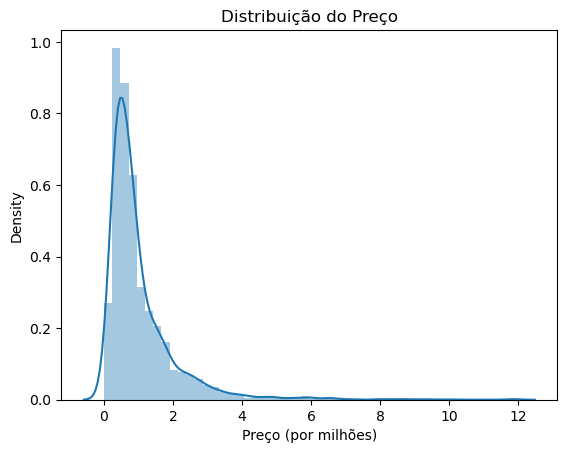

In [16]:
#Criação de um grãfico com a frequencia dos preços
warnings.filterwarnings("ignore") #Não exibir weanings
sns.distplot(df_merge.price/1e6)
plt.title("Distribuição do Preço")
plt.xlabel("Preço (por milhões)")
plt.show()

In [17]:
#Podemos visualizar que temos uma pequena quantidade de imóveis com valores muito altas e alguns muito próximos de 0

In [18]:
#Para os cálcular o percentil utilizamos uma função da biblioteca numpy
import numpy as np

In [19]:
#Segue os atuais preços mínimo e máximo 

print(f"Valor Mínimo: R$ {df_merge.price.min()}")
print(f"Valor Máximo: R$ {df_merge.price.max()}")
print(f"Valor da Média: R$ {df_merge.price.mean()}")
print(f"Valor da Mediana: R$ {df_merge.price.median()}")
print(f"Valor da Desvio Padrão: R$ {df_merge.price.std()}")
print(f"Valor da Percentil 25%: R$ {np.percentile(df_merge.price, 25)}")
print(f"Valor da Percentil 75%: R$ {np.percentile(df_merge.price, 75)}")
print(f"Valor da Percentil 95%: R$ {np.percentile(df_merge.price, 95)}")

Valor Mínimo: R$ 550.0
Valor Máximo: R$ 11900000.0
Valor da Média: R$ 1029858.7339911008
Valor da Mediana: R$ 700000.0
Valor da Desvio Padrão: R$ 1066289.645615779
Valor da Percentil 25%: R$ 430000.0
Valor da Percentil 75%: R$ 1235000.0
Valor da Percentil 95%: R$ 2894046.799999999


In [17]:
#Temos imóveis com valores irreais de 550 reais, claramente um erro no preenchimento a quase 12 milhões

In [20]:
#Para tratamento desses casos de Outliers vamos considerar somente os valores com preço abaixo de 95% de percentil
df_merge = df_merge[df_merge.price < df_merge.price.quantile(0.95)]

#Também aplicaremos um filtro de valor mínimo
df_merge = df_merge[df_merge.price >= 1e5]

print(f"Valor Mínimo: R$ {df_merge.price.min()}")
print(f"Valor Máximo: R$ {df_merge.price.max()}")
print(f"Valor da Média: R$ {df_merge.price.mean()}")
print(f"Valor da Mediana: R$ {df_merge.price.median()}")
print(f"Valor da Desvio Padrão: R$ {df_merge.price.std()}")
print(f"Valor da Percentil 25%: R$ {np.percentile(df_merge.price, 25)}")
print(f"Valor da Percentil 75%: R$ {np.percentile(df_merge.price, 75)}")
print(f"Valor da Percentil 95%: R$ {np.percentile(df_merge.price, 95)}")
print(f"Quantidade de Registros: {df_merge.price.count()}")

Valor Mínimo: R$ 110000.0
Valor Máximo: R$ 2892617.0
Valor da Média: R$ 860477.7316518503
Valor da Mediana: R$ 680000.0
Valor da Desvio Padrão: R$ 593432.2128203684
Valor da Percentil 25%: R$ 429000.0
Valor da Percentil 75%: R$ 1100000.0
Valor da Percentil 95%: R$ 2190000.0
Quantidade de Registros: 4837


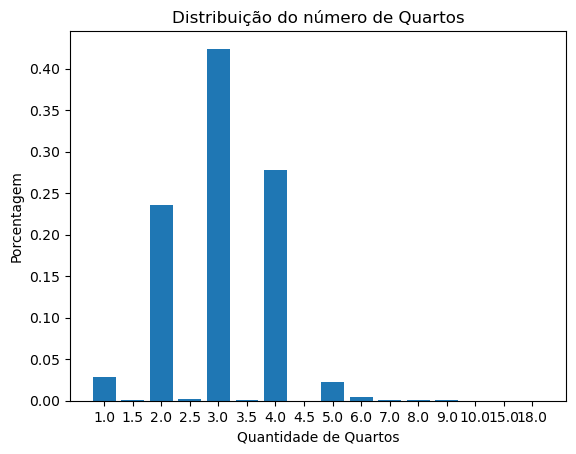

In [21]:
#Distruibuição dos quartos
qtde_quartos = df_merge.rooms_vl_medio.value_counts().sort_index()

plt.bar([str(value) for value in qtde_quartos.index], qtde_quartos.values/df_merge.shape[0])
plt.title("Distribuição do número de Quartos")
plt.xlabel("Quantidade de Quartos")
plt.ylabel("Porcentagem")
plt.show()

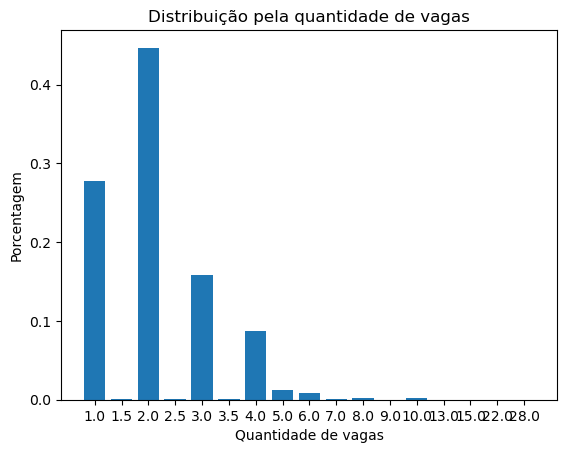

In [22]:
#Distruibuição da quantidade de vagas
qtde_vagas = df_merge.garage_places_vl_medio.value_counts().sort_index()

plt.bar([str(value) for value in qtde_vagas.index], qtde_vagas.values/df_merge.shape[0])
plt.title("Distribuição pela quantidade de vagas")
plt.xlabel("Quantidade de vagas")
plt.ylabel("Porcentagem")
plt.show()

In [23]:
#Distribuição pela faixa de tamanho
df_square_foot_faixa = df_merge
df_square_foot_faixa['df_square_foot_faixa'] = pd.cut(df_merge['square_foot_vl_medio'], bins=15)

g = df_square_foot_faixa.groupby('df_square_foot_faixa')

# Iterar como se fosse um dicionário com a chave do grupo e o DataFrame
for chave, grupo in g:
    print(f'A faixa de tamanho do imóvel é: {chave} e a quantidade de registros é: {grupo.shape[0]}.')

A faixa de tamanho do imóvel é: (12.9, 87.333] e a quantidade de registros é: 1745.
A faixa de tamanho do imóvel é: (87.333, 160.667] e a quantidade de registros é: 1844.
A faixa de tamanho do imóvel é: (160.667, 234.0] e a quantidade de registros é: 708.
A faixa de tamanho do imóvel é: (234.0, 307.333] e a quantidade de registros é: 284.
A faixa de tamanho do imóvel é: (307.333, 380.667] e a quantidade de registros é: 134.
A faixa de tamanho do imóvel é: (380.667, 454.0] e a quantidade de registros é: 65.
A faixa de tamanho do imóvel é: (454.0, 527.333] e a quantidade de registros é: 24.
A faixa de tamanho do imóvel é: (527.333, 600.667] e a quantidade de registros é: 17.
A faixa de tamanho do imóvel é: (600.667, 674.0] e a quantidade de registros é: 7.
A faixa de tamanho do imóvel é: (674.0, 747.333] e a quantidade de registros é: 2.
A faixa de tamanho do imóvel é: (747.333, 820.667] e a quantidade de registros é: 2.
A faixa de tamanho do imóvel é: (820.667, 894.0] e a quantidade de 

In [24]:
#Definindo o Mapa
from geopy.geocoders import Nominatim
from sklearn import preprocessing
import folium

city = "Belo Horizonte"
locator = Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
location = [location.latitude, location.longitude]

In [25]:
#Avaliando a localização dos imóveis no mapa
df_merge['id'] = df_merge.index #Criando coluna de id para identificar o registro

x, y = "latitude", "longitude"
color = "neighborhood"
size = "price"
popup = "id"
data = df_merge.copy()

#Criando cores para as colunas
lst_elements = sorted(list(df_merge[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xffffff) for i in
             range(len(lst_elements))]

data["color"] = data[color].apply(lambda x:
                                 lst_colors[lst_elements.index(x)])
#Criando o tamanho dda coluna
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["price"] = scaler.fit_transform(
                data[size].values.reshape(-1,1)).reshape(-1)

#Inizializando o Mapa com uma localização inicial
map_ = folium.Map(location=location, titles="Mapa das coordenadas geográficas",
               zoom_start=11)

#Adicionar pontos
data.apply(lambda row: folium.CircleMarker(
            location=[row[x],row[y]], popup=row[popup],
            color=row["color"], fill=True,
            radius=row["price"]).add_to(map_), axis=1)

#Adicionando legenda HTML
legend_html = """<div style=position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""";</b><br>"""
for i in lst_elements:
    legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
    fa-1x" style=color;"""+lst_colors[lst_elements.index(i)]+"""">
    </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

#Exibir Mapa
map_

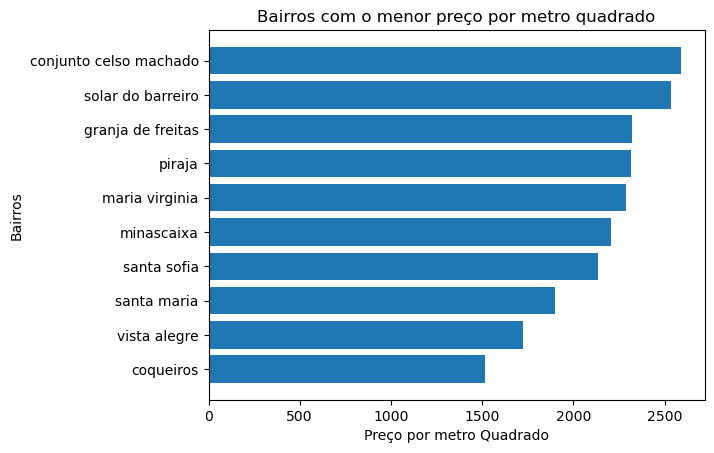

In [26]:
#Bairros com o menor preço por metro quadrado
df_merge["price_m2"] = df_merge["price"] / df_merge["square_foot_vl_medio"]
df_merge_m2_price = df_merge.groupby("neighborhood").agg({"price_m2": "mean"}).sort_values(by="price_m2")

plt.barh(df_merge_m2_price[:10].index, df_merge_m2_price[:10].values.reshape(-1))
plt.title("Bairros com o menor preço por metro quadrado")
plt.xlabel("Preço por metro Quadrado")
plt.ylabel("Bairros")
plt.show()

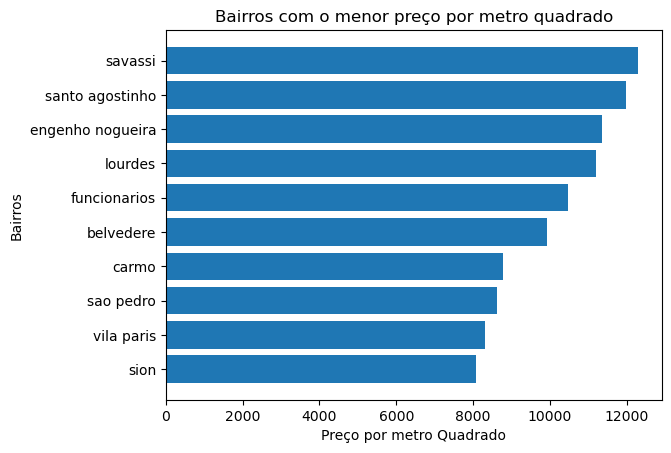

In [27]:
#Bairros com o maior preço por metro quadrrado

plt.barh(df_merge_m2_price[-10:].index, df_merge_m2_price[-10:].values.reshape(-1))
plt.title("Bairros com o menor preço por metro quadrado")
plt.xlabel("Preço por metro Quadrado")
plt.ylabel("Bairros")
plt.show()

In [28]:
#Realizado a junção dos DataFrames usando inner, sendo assim considerado somente os campos comuns entre as duas bases
df_merge_m2_price.rename(columns={'price_m2':'neighborhood_price_m2'},inplace=True)
df_merge = pd.merge(df_merge, df_merge_m2_price, how = 'inner', on = 'neighborhood')

#Segue visualização do DataFrame com 5.846 registros
df_merge

price        neighborhood              city   latitude  longitude  \
0     330000.0          luxemburgo   Belo Horizonte  -19.936415 -43.953396   
1     850000.0          luxemburgo   Belo Horizonte  -19.950826 -43.958545   
2     610000.0          luxemburgo   Belo Horizonte  -19.946804 -43.957575   
3     850000.0          luxemburgo   Belo Horizonte  -19.950826 -43.958545   
4     950000.0          luxemburgo   Belo Horizonte  -19.943202 -43.955497   
...        ...                 ...               ...        ...        ...   
4832  555000.0       alto caicaras   Belo Horizonte  -19.899603 -43.977840   
4833  430000.0       alto caicaras   Belo Horizonte  -19.899040 -43.976745   
4834  330000.0       alto caicaras   Belo Horizonte  -19.898104 -43.968946   
4835  500000.0  vila jardim leblon   Belo Horizonte  -19.826221 -43.992207   
4836  205900.0  vila jardim leblon   Belo Horizonte  -19.825497 -43.986341   

      qde_lancamentos   vl_lancado  vl_medio_iptu  rooms_vl_medio  \
0              4430.0  19009728.42    4291.135084             1.0   
1              4430.0  19009728.42    4291.135084             3.0   
2              4430.0  19009728.42    4291.135084             3.0   
3              4430.0  19009728.42    4291.135084             3.0   
4              4430.0  19009728.42    4291.135084             5.0   
...               ...          ...            ...             ...   
4832           2476.0   6078153.46    2454.827730             3.0   
4833           2476.0   6078153.46    2454.827730             2.0   
4834           2476.0   6078153.46    2454.827730             3.0   
4835             14.0     11866.58     847.612857             3.0   
4836             14.0     11866.58     847.612857             2.0   

      garage_places_vl_medio  square_foot_vl_medio df_square_foot_faixa    id  \
0                        1.0                  40.0       (12.9, 87.333]     0   
1                        2.0                 120.0    (87.333, 160.667]     1   
2                        2.0                 120.0    (87.333, 160.667]     2   
3                        2.0                 120.0    (87.333, 160.667]     3   
4                        3.0                 335.0   (307.333, 380.667]     4   
...                      ...                   ...                  ...   ...   
4832                     2.0                 141.0    (87.333, 160.667]  5910   
4833                     1.0                  69.0       (12.9, 87.333]  5911   
4834                     2.0                  85.0       (12.9, 87.333]  5913   
4835                     2.0                 150.0    (87.333, 160.667]  5916   
4836                     1.0                  60.0       (12.9, 87.333]  5917   

         price_m2  neighborhood_price_m2  
0     8250.000000            7718.238236  
1     7083.333333            7718.238236  
2     5083.333333            7718.238236  
3     7083.333333            7718.238236  
4     2835.820896            7718.238236  
...           ...                    ...  
4832  3936.170213            4683.469071  
4833  6231.884058            4683.469071  
4834  3882.352941            4683.469071  
4835  3333.333333            3382.500000  
4836  3431.666667            3382.500000  

[4837 rows x 15 columns]

In [29]:
#Para a analise do tamanho criamos a faixa de tamanho, a mesma não será utilizada no modelo
df_merge = df_merge.drop(['df_square_foot_faixa'], axis = 1)
#Para identificação da registro na seleção do mapa, criamos um id, este não será utilizado no modelo
df_merge = df_merge.drop(['id'], axis = 1)
#O preço por metro quadrado, a variável alvo pelo tamanho, não será utilizado no modelo
df_merge = df_merge.drop(['price_m2'], axis = 1)

In [30]:
#Necessário instalar o scipy e importar a biblioteca pearsonr
#pip install scipy
from scipy.stats import pearsonr

In [31]:
#Avaliar a correlação de todas as variáveis usando a função pearson do Scipy

print('Correlação da variável price: %0.5f' % pearsonr(df_merge['price'],df_merge['price'])[0])
print('Correlação da variável latitude: %0.5f' % pearsonr(df_merge['latitude'],df_merge['price'])[0])
print('Correlação da variável longitude: %0.5f' % pearsonr(df_merge['longitude'],df_merge['price'])[0])
print('Correlação da variável qde_lancamentos: %0.5f' % pearsonr(df_merge['qde_lancamentos'],df_merge['price'])[0])
print('Correlação da variável vl_lancado: %0.5f' % pearsonr(df_merge['vl_lancado'],df_merge['price'])[0])
print('Correlação da variável vl_medio_iptu: %0.5f' % pearsonr(df_merge['vl_medio_iptu'],df_merge['price'])[0])
print('Correlação da variável rooms_vl_medio: %0.5f' % pearsonr(df_merge['rooms_vl_medio'],df_merge['price'])[0])
print('Correlação da variável garage_places_vl_medio: %0.5f' % pearsonr(df_merge['garage_places_vl_medio'],df_merge['price'])[0])
print('Correlação da variável square_foot_vl_medio: %0.5f' % pearsonr(df_merge['square_foot_vl_medio'],df_merge['price'])[0])
print('Correlação da variável neighborhood_price_m2: %0.5f' % pearsonr(df_merge['neighborhood_price_m2'],df_merge['price'])[0])

Correlação da variável price: 1.00000
Correlação da variável latitude: -0.09857
Correlação da variável longitude: 0.07106
Correlação da variável qde_lancamentos: 0.21054
Correlação da variável vl_lancado: 0.39763
Correlação da variável vl_medio_iptu: 0.34301
Correlação da variável rooms_vl_medio: 0.52370
Correlação da variável garage_places_vl_medio: 0.57110
Correlação da variável square_foot_vl_medio: 0.57416
Correlação da variável neighborhood_price_m2: 0.50200


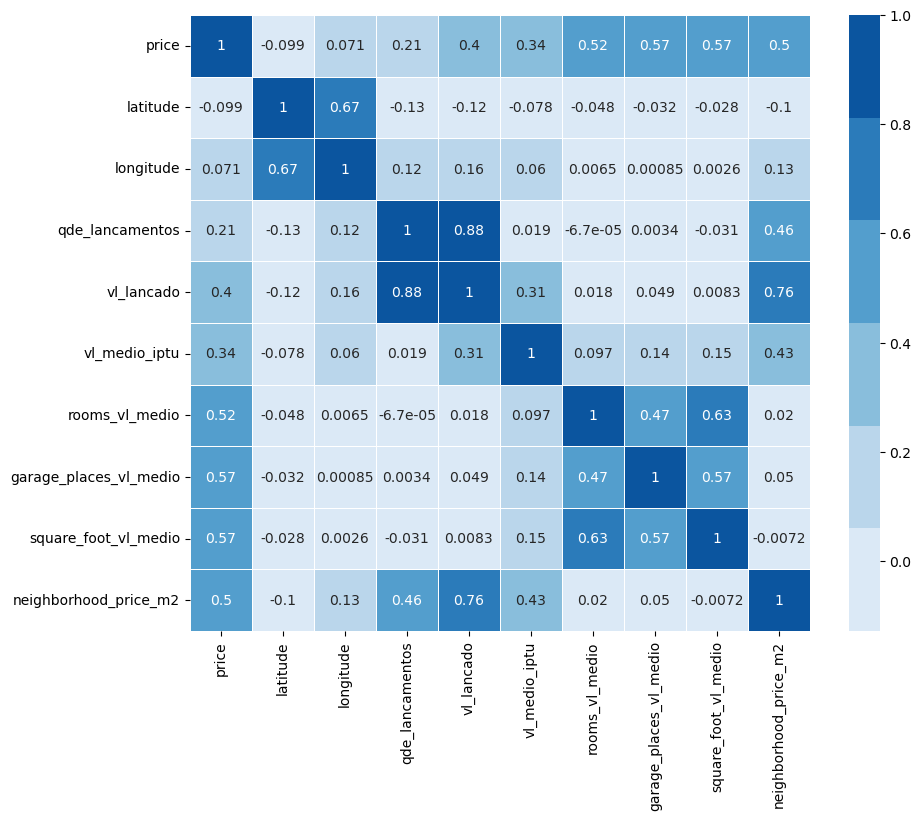

In [32]:
#Podemos usar uma visão grafica da correlação
corr = df_merge.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [33]:
#É importante avaliar a multicolinearidade das variáveis, ou podemos tendenciar o modelo

x = df_merge.iloc[:,3:-1]
variables = df_merge.columns[3:-1]

corr = np.corrcoef(x, rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

#Buscar valores muito próximos a zero
print(eigenvalues)

[2.18911368 1.66421397 1.95708069 0.95214384 0.5399437  0.27959235
 0.34306361 0.07484816]


In [34]:
#Na posição que tivemos um valor muito próximo a zero, buscaremos posições com valores mais distantes de zero
print(eigenvectors[:,7])

[ 0.00106066  0.01967778  0.66541873 -0.71067938  0.22695163 -0.01164125
  0.00985698 -0.00496619]


In [35]:
#Agora exibiremos as variáveis nas posições com valores altos
print(variables[2],variables[3],variables[4])

qde_lancamentos vl_lancado vl_medio_iptu


Vemos que a maioria dos erros é pequeno, próximos de zero, mostrando que podemos prever o valor usando uma regressão linear


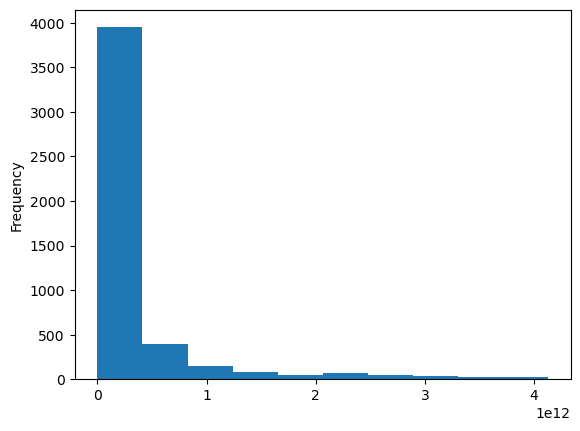

In [36]:
#Calculando a média da variável resposta
valor_medio_price = df_merge['price'].mean()

#Vamos simular se os preços estão próximos da média
squared_errors = pd.Series(valor_medio_price - df_merge['price'])**2
sse = np.sum(squared_errors)

#Exibindo um histograma dos erros
hist_plot = squared_errors.plot.hist()

print('Vemos que a maioria dos erros é pequeno, próximos de zero, mostrando que podemos prever o valor usando uma regressão linear')

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

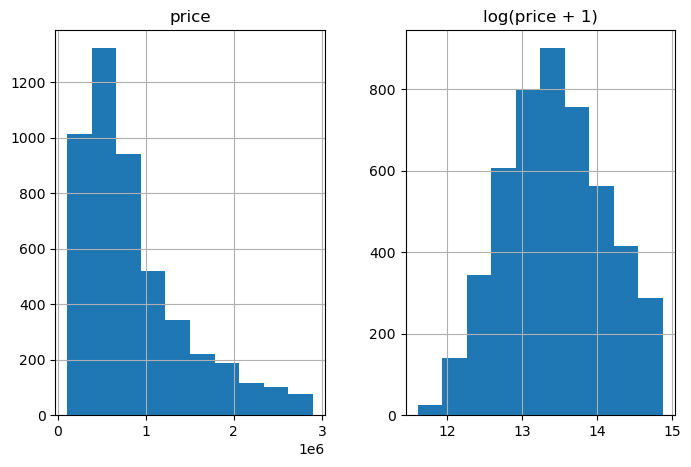

In [37]:
import matplotlib

#Ajustando os dados de preço para uma distribuição normalizada
new_price = {"price":df_merge['price'], "log(price + 1)":np.log1p(df_merge['price'])}
prices = pd.DataFrame(new_price)
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
prices.hist()

In [38]:
#Retirar as colunas de multicolinearidade
df_merge = df_merge.drop(['qde_lancamentos'], axis = 1)
df_merge = df_merge.drop(['vl_medio_iptu'], axis = 1)

#Retirar as colunas de cidade e bairro que não serão usadas no modelo
df_merge = df_merge.drop(['city'], axis = 1)
df_merge = df_merge.drop(['neighborhood'], axis = 1)

#Retirar as colunas latitude e longitude que não se mostraram correlacionadas ao preço
df_merge = df_merge.drop(['latitude'], axis = 1)
df_merge = df_merge.drop(['longitude'], axis = 1)

df_merge

price   vl_lancado  rooms_vl_medio  garage_places_vl_medio  \
0     330000.0  19009728.42             1.0                     1.0   
1     850000.0  19009728.42             3.0                     2.0   
2     610000.0  19009728.42             3.0                     2.0   
3     850000.0  19009728.42             3.0                     2.0   
4     950000.0  19009728.42             5.0                     3.0   
...        ...          ...             ...                     ...   
4832  555000.0   6078153.46             3.0                     2.0   
4833  430000.0   6078153.46             2.0                     1.0   
4834  330000.0   6078153.46             3.0                     2.0   
4835  500000.0     11866.58             3.0                     2.0   
4836  205900.0     11866.58             2.0                     1.0   

      square_foot_vl_medio  neighborhood_price_m2  
0                     40.0            7718.238236  
1                    120.0            7718.238236  
2                    120.0            7718.238236  
3                    120.0            7718.238236  
4                    335.0            7718.238236  
...                    ...                    ...  
4832                 141.0            4683.469071  
4833                  69.0            4683.469071  
4834                  85.0            4683.469071  
4835                 150.0            3382.500000  
4836                  60.0            3382.500000  

[4837 rows x 6 columns]

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

#Separação das variáveis explicativas e a variável alvo
x = df_merge[['vl_lancado','rooms_vl_medio','garage_places_vl_medio','square_foot_vl_medio','neighborhood_price_m2']]
y = np.log1p(df_merge['price'])

#Separação da base em treino e teste (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [40]:
#Criando um função para calcular o RMSE
def rmse_cv(modelo, x, y):
    rmse = np.sqrt(-cross_val_score(modelo,
                                    x,
                                    y,
                                    scoring = "neg_mean_squared_error",
                                    cv = 5))
    return(rmse)

In [41]:
#Modelo de Regressão Ridge
from sklearn.linear_model import Ridge

modelo_regressao_ridge = Ridge().fit(x_train, y_train)

print("Resultados na base de treino")
print('RMSE:',rmse_cv(modelo_regressao_ridge,x_train,y_train).mean())
print('R2:',r2_score(y_train, modelo_regressao_ridge.fit(x_train, y_train).predict(x_train)))
print('------------------------------------')
print("Resultados na base de testes")
print('RMSE:',rmse_cv(modelo_regressao_ridge,x_test,y_test).mean())
print('R2:',r2_score(y_test, modelo_regressao_ridge.fit(x_train, y_train).predict(x_test)))

Resultados na base de treino
RMSE: 0.3456456490386794
R2: 0.7407477698516298
------------------------------------
Resultados na base de testes
RMSE: 0.35913949108215515
R2: 0.726482058642238


In [43]:
#Modelo Randon Forest
from sklearn.ensemble import RandomForestRegressor

modelo_random_forest = RandomForestRegressor().fit(x_train, y_train)

print("Resultados na base de treino")
print('RMSE:',rmse_cv(modelo_random_forest,x_train,y_train).mean())
print('R2:',r2_score(y_train, modelo_random_forest.fit(x_train, y_train).predict(x_train)))
print('------------------------------------')
print("Resultados na base de testes")
print('RMSE:',rmse_cv(modelo_random_forest,x_test,y_test).mean())
print('R2:',r2_score(y_test, modelo_random_forest.fit(x_train, y_train).predict(x_test)))

Resultados na base de treino
RMSE: 0.26373273079754095
R2: 0.972012379687508
------------------------------------
Resultados na base de testes
RMSE: 0.27915401128084116
R2: 0.8522407293962022


In [44]:
#Modelo Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

modelo_gbr = GradientBoostingRegressor().fit(x_train, y_train)

print("Resultados na base de treino")
print('RMSE:',rmse_cv(modelo_gbr,x_train,y_train).mean())
print('R2:',r2_score(y_train, modelo_gbr.fit(x_train, y_train).predict(x_train)))
print('------------------------------------')
print("Resultados na base de testes")
print('RMSE:',rmse_cv(modelo_gbr,x_test,y_test).mean())
print('R2:',r2_score(y_test, modelo_gbr.fit(x_train, y_train).predict(x_test)))

Resultados na base de treino
RMSE: 0.2605294145920486
R2: 0.8726465006076616
------------------------------------
Resultados na base de testes
RMSE: 0.27176844186425314
R2: 0.8446570297717151


In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Definição dos parâmetros
param_dist = {"n_estimators": [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)],
              "max_depth": [int(x) for x in np.linspace(1, 10, num = 10)],
              "random_state": [0, 1, 3, 5, None],
              "max_features": ['auto', 'sqrt'],
              "min_samples_split": [2, 5, 8, 10, None],
              "min_samples_leaf": [1, 2, 3, 4, None],
              "bootstrap": [True, False]}

# Para o classificador criado com ExtraTrees, testamos diferentes combinações de parâmetros
rsearch = RandomizedSearchCV(modelo_random_forest, param_distributions = param_dist, n_iter = 50, return_train_score = True)  

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
rsearch.fit(x_train, y_train)

# Resultados 
rsearch.cv_results_

# Imprimindo o melhor estimador
best = rsearch.best_estimator_
print (best)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=5, n_estimators=450,
                      random_state=3)


In [45]:
#Modelo Randon Forest
from sklearn.ensemble import RandomForestRegressor

modelo_random_forest_tuning = RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=5, n_estimators=450,
                      random_state=3).fit(x_train, y_train)

print("Resultados na base de treino")
print('RMSE:',rmse_cv(modelo_random_forest_tuning,x_train,y_train).mean())
print('R2:',r2_score(y_train, modelo_random_forest_tuning.fit(x_train, y_train).predict(x_train)))
print('------------------------------------')
print("Resultados na base de testes")
print('RMSE:',rmse_cv(modelo_random_forest_tuning,x_test,y_test).mean())
print('R2:',r2_score(y_test, modelo_random_forest_tuning.fit(x_train, y_train).predict(x_test)))

Resultados na base de treino
RMSE: 0.2560262796956455
R2: 0.912396267978154
------------------------------------
Resultados na base de testes
RMSE: 0.269101698031397
R2: 0.8566448524202089


In [49]:
#Realizando uma previsão

#Atribuindo valores de entrada para realizar a previsão
bairro = "buritis"
vagas = 1.0
quartos = 3.0
tamanho = 70.0

#Atribuir vl_lancado de iptu e o preco médio do metro quadrado de acordo com o bairro informado
valor_lancado_iptu = df_iptu.query(f'neighborhood=="{bairro}"')['vl_lancado'].iloc[0]
preco_m2_bairro = df_merge_m2_price.query(f'neighborhood=="{bairro}"')['neighborhood_price_m2'].iloc[0]

#lista com os valores das variáveis
dados_previsao = [valor_lancado_iptu,vagas,quartos,tamanho,preco_m2_bairro]

#Reshape dos dados
xp = np.array(dados_previsao).reshape(1,-1)

previsao = np.exp(modelo_random_forest_tuning.predict(xp))-1

#previsao
print("A previsão com o preço sugerido para o imóvel é:", previsao)

A previsão com o preço sugerido para o imóvel é: [538889.09160485]
